# Notebook de regresión lineal

## Física Computacional I.

**Elaborado por Santiago Echeverri Arteaga**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [11]:
import warnings
warnings.simplefilter("ignore")

### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [13]:
lr = LinearRegression()

#### Regresión Lineal con OneHotEncoding -- Análsis de la compensación Bias-Variace

In [14]:
import os
csv= [i for i in os.listdir() if ".csv" in i]
csv

['AmesHousing.csv']

In [15]:
import os
import pandas as pd
import numpy as np

# Importar datos usando una ruta de donde están los archivos (Lista de cadenas) y el nombre del documento
filepath = os.path.join(os.getcwd(),csv[0])
data = pd.read_csv(filepath)

data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [16]:
data.Neighborhood.unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [17]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [18]:
data.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

In [19]:
# Select the object (string) columns
mask = data.dtypes == object
categorical_cols = data.columns[mask]
categorical_cols

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [20]:
# Cuántos valores únicos hay en cada categoría? Ordenados de mayor a menor
num_ohc_cols = (data[categorical_cols].apply(lambda x: x.nunique()).sort_values(ascending=False))
display(num_ohc_cols)
# Filtrar las que tienen más de un valor
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Se eliminaría una de las creadas por OneHotEncoding para que no se de overfitting
small_num_ohc_cols -= 1

# ¿Cuántas habría?
small_num_ohc_cols.sum()

Neighborhood      28
Exterior 2nd      17
Exterior 1st      16
Sale Type         10
Condition 1        9
Functional         8
Condition 2        8
House Style        8
Roof Matl          8
MS Zoning          7
Garage Type        6
Heating            6
BsmtFin Type 2     6
BsmtFin Type 1     6
Foundation         6
Sale Condition     6
Roof Style         6
Lot Config         5
Misc Feature       5
Garage Cond        5
Garage Qual        5
Fireplace Qu       5
Kitchen Qual       5
Mas Vnr Type       5
Heating QC         5
Electrical         5
Bsmt Qual          5
Bsmt Cond          5
Bldg Type          5
Exter Cond         5
Exter Qual         4
Bsmt Exposure      4
Land Contour       4
Fence              4
Lot Shape          4
Pool QC            4
Paved Drive        3
Utilities          3
Land Slope         3
Garage Finish      3
Street             2
Central Air        2
Alley              2
dtype: int64

225

***Las siguientes líneas son para explicar lo que hace el ciclo for que sigue***

In [21]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
data_ohc = data.copy()

# Los encoders
le = LabelEncoder()
ohc = OneHotEncoder()
#display(len(data_ohc['Neighborhood'].unique()))
#display(len(data_ohc['Neighborhood']))
len(le.fit_transform(data_ohc['Neighborhood']).astype(int))

2930

In [22]:
data_ohc['Neighborhood'][:10]

0      NAmes
1      NAmes
2      NAmes
3      NAmes
4    Gilbert
5    Gilbert
6    StoneBr
7    StoneBr
8    StoneBr
9    Gilbert
Name: Neighborhood, dtype: object

In [23]:
le.fit_transform(data_ohc['Neighborhood']).astype(int)[:10]

array([15, 15, 15, 15,  8,  8, 25, 25, 25,  8])

In [24]:
dat = le.fit_transform(data_ohc['Neighborhood']).astype(int)

display(dat.reshape(-1,1))

array([[15],
       [15],
       [15],
       ...,
       [14],
       [14],
       [14]])

In [25]:
# Codificando valores categóricos a valores enteros
dat = le.fit_transform(data_ohc['Neighborhood']).astype(int)
# One hot encoding. Esto regresa un sparse array
new_dat = ohc.fit_transform(dat.reshape(-1,1))
print(new_dat)
print("SHAPE",new_dat.shape)
# Crea los nombres de las columnas
n_cols = new_dat.shape[1] # Cantidad de filas nuevas
['_'.join(['Neighborhood', str(x)]) for x in range(n_cols)]


  (0, 15)	1.0
  (1, 15)	1.0
  (2, 15)	1.0
  (3, 15)	1.0
  (4, 8)	1.0
  (5, 8)	1.0
  (6, 25)	1.0
  (7, 25)	1.0
  (8, 25)	1.0
  (9, 8)	1.0
  (10, 8)	1.0
  (11, 8)	1.0
  (12, 8)	1.0
  (13, 8)	1.0
  (14, 25)	1.0
  (15, 25)	1.0
  (16, 8)	1.0
  (17, 25)	1.0
  (18, 8)	1.0
  (19, 17)	1.0
  (20, 17)	1.0
  (21, 17)	1.0
  (22, 24)	1.0
  (23, 15)	1.0
  (24, 15)	1.0
  :	:
  (2905, 14)	1.0
  (2906, 14)	1.0
  (2907, 14)	1.0
  (2908, 13)	1.0
  (2909, 13)	1.0
  (2910, 13)	1.0
  (2911, 14)	1.0
  (2912, 14)	1.0
  (2913, 13)	1.0
  (2914, 13)	1.0
  (2915, 14)	1.0
  (2916, 13)	1.0
  (2917, 13)	1.0
  (2918, 13)	1.0
  (2919, 13)	1.0
  (2920, 13)	1.0
  (2921, 14)	1.0
  (2922, 14)	1.0
  (2923, 14)	1.0
  (2924, 14)	1.0
  (2925, 14)	1.0
  (2926, 14)	1.0
  (2927, 14)	1.0
  (2928, 14)	1.0
  (2929, 14)	1.0
SHAPE (2930, 28)


['Neighborhood_0',
 'Neighborhood_1',
 'Neighborhood_2',
 'Neighborhood_3',
 'Neighborhood_4',
 'Neighborhood_5',
 'Neighborhood_6',
 'Neighborhood_7',
 'Neighborhood_8',
 'Neighborhood_9',
 'Neighborhood_10',
 'Neighborhood_11',
 'Neighborhood_12',
 'Neighborhood_13',
 'Neighborhood_14',
 'Neighborhood_15',
 'Neighborhood_16',
 'Neighborhood_17',
 'Neighborhood_18',
 'Neighborhood_19',
 'Neighborhood_20',
 'Neighborhood_21',
 'Neighborhood_22',
 'Neighborhood_23',
 'Neighborhood_24',
 'Neighborhood_25',
 'Neighborhood_26',
 'Neighborhood_27']

In [26]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Codificando valores categóricos a valores enteros
    dat = le.fit_transform(data_ohc[col]).astype(int)
    
    # Eliminar la columna original
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encoding. Esto regresa un sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Crea los nombres de las columnas
    n_cols = new_dat.shape[1] # Cantidad de filas nuevas
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)] # Nombre ColumnaVieja_i para i desde 0 a n_cols-1

    # Crea el DataFrame
    new_df = pd.DataFrame(new_dat.toarray(), index=data_ohc.index, columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [27]:
data_ohc.shape[1] - data.shape[1]

241

In [28]:
data_ohc.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Finish_1,Garage Finish_2,Garage Finish_3,Street_0,Street_1,Central Air_0,Central Air_1,Alley_0,Alley_1,Alley_2
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [29]:
print(data.shape[1])

# Remover del DataFrame original las columnas tipo string
data = data.drop(num_ohc_cols.index, axis=1)

print(data.shape[1])

82
39


In [30]:
data = data.dropna()
data_ohc = data_ohc.dropna()

***Dividir los dos DataFrames en Entrenamiento/Prueba***

In [46]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=43)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=43)

In [49]:
print(f"{X_train.shape}+{X_test.shape}={X_data.shape}")

(1591, 38)+(683, 38)=(2274, 38)


In [47]:
# Al poner el mismo estado aleatorio inicial se seleccionan los mismos conjuntos de datos
(X_train_ohc.index == X_train.index).all()

True

***Error cuadrático medio en ambos casos para los conjuntos de Entremaniento y Prueba***

Esto se hace para determinar que tanto overfitting se tiene

El mejor valor posible del coeficiente de determinación R2 (NO ES PEARSON) es 1.0 y no tiene cota inferior, pues el modelo puede ser arbitrariamente malo

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from time import time

LR = LinearRegression()
LR2 = LinearRegression()
# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
t0 = time()
LR = LR.fit(X_train, y_train)
print(time() - t0)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': '{:.2f}'.format(r2_score(y_train, y_train_pred)),
                           'test' : '{:.2f}'.format(r2_score(y_test,  y_test_pred))},
                           name='no enc'))

# Data that have been one-hot encoded
LR2 = LR2.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR2.predict(X_train_ohc)
y_test_ohc_pred = LR2.predict(X_test_ohc)

error_df.append(pd.Series({'train': '{:.2f}'.format(r2_score(y_train_ohc, y_train_ohc_pred)),
                           'test' : '{:.2f}'.format(r2_score(y_test_ohc,  y_test_ohc_pred))},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

0.06460690498352051


,no enc,one-hot enc
train,0.89,0.95
test,0.63,0.69


In [52]:
LR.coef_

array([-1.95492042e+01,  4.97610803e-06, -1.74080995e+02, -1.37900407e+02,
        6.85073327e-01,  1.88928614e+04,  2.79903737e+03,  2.66201401e+02,
        2.04092532e+02,  3.88040449e+01,  8.36204414e+00,  4.80963418e+00,
       -5.80069477e+00,  7.37098356e+00,  2.11667591e+01,  9.20126896e+00,
        2.09757281e+00,  3.24656008e+01,  8.11632030e+03, -2.34556077e+03,
        2.50995262e+03,  3.56110337e+03, -8.53069074e+03, -2.89757639e+04,
        5.43464686e+03,  3.33721981e+03, -6.84187557e+01,  8.87399188e+03,
        3.00350472e+01,  2.01636308e+01, -5.44509560e+00,  2.02448326e+01,
       -8.58090926e+00,  7.81052981e+01, -1.58383048e+02, -2.54968279e-01,
       -4.80875959e+01, -1.32303804e+04])

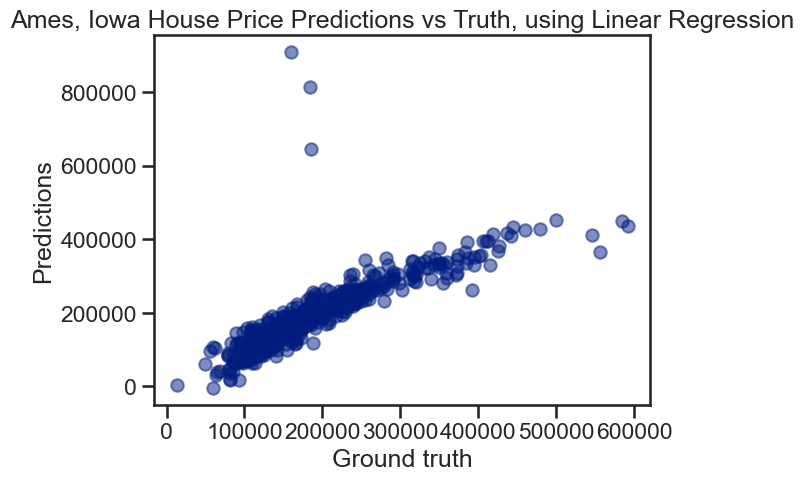

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');

**GUARDAR E IMPORTAR MODELOS**

In [60]:
import pickle
pickle.dump(LR, open('Modelo_lr1.p', 'wb'))

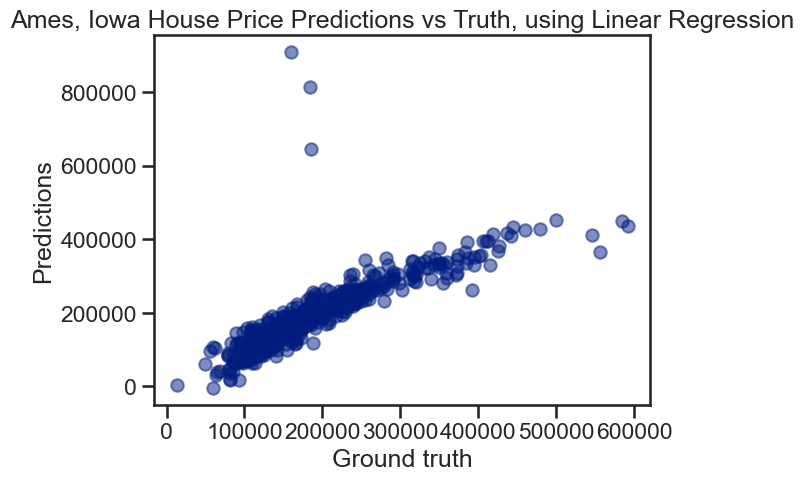

In [61]:
LR_loaded = pickle.load(open('Modelo_lr1.p', 'rb'))
y_NEW_pred = LR_loaded.predict(X_test)
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_NEW_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');